# Additional figures

In [4]:
from __future__ import annotations

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML, display
from shapely import Polygon
from tabulate import tabulate
from tilemapbase import Extent

from adaptive_planner.location import Location
from adaptive_planner.io.geojson import read_polygon_file
from adaptive_planner.io.kml import read_kml_file
from adaptive_planner.io.topcon import read_topcon_data
from adaptive_planner.visualisation import plot_img_with_zoom_section, plot_markers, save_fig


Define helper functions:

In [2]:
def _display_table(table_html: str) -> None:
    display(
        HTML(
            f"""
        <div style="max-height: 300px; overflow-y: auto; border: 1px solid #ccc;">
            {table_html}
        </div>
        """
        )
    )

## Example images with zoom

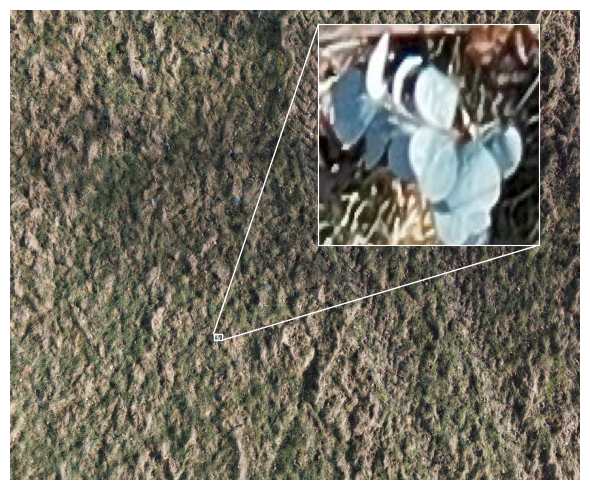

In [2]:
img = Path("/home/abe/data/20240213_clustered_1/DJI_202402131154_008_MappingCluster12m/DJI_20240213115802_0009.JPG")

fig, ax = plt.subplots(figsize=(6, 5))

plot_img_with_zoom_section(img, -0.5, -0.4, -1.92, -1.82, ax=ax)

fig.tight_layout()
save_fig("figures/example_annotation_w_12m_zoom.pdf", fig, format="pdf", dpi=300, bbox_inches="tight", pad_inches=0)
fig.show()

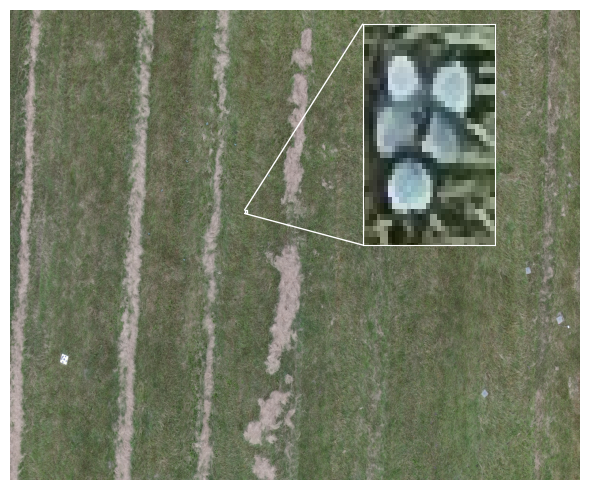

In [3]:
img = Path("/home/abe/data/20240801_clustered_4/DJI_202408010952_003_BennekomMappingCluster32m/DJI_20240801102147_0067.JPG")

fig, ax = plt.subplots(figsize=(6, 5))

plot_img_with_zoom_section(img, -0.12, -0.09, -0.03, 0.02, ax=ax)

fig.tight_layout()
save_fig("figures/example_annotation_w_32m_zoom.pdf", fig, format="pdf", dpi=300, bbox_inches="tight", pad_inches=0)
fig.show()

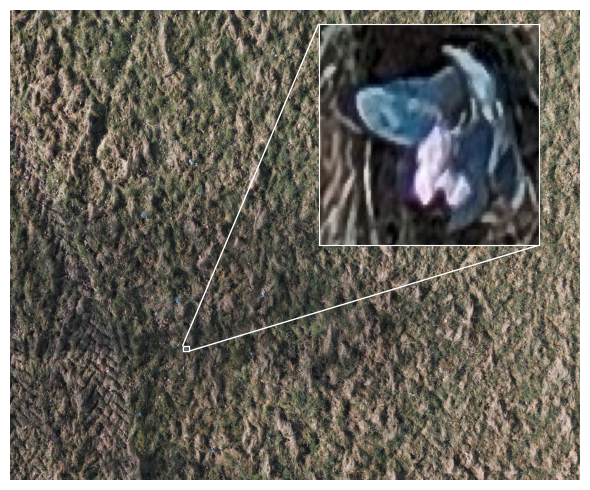

In [4]:
img = Path("/home/abe/data/20240213_clustered_1/DJI_202402131154_008_MappingCluster12m/DJI_20240213120025_0148.JPG")

fig, ax = plt.subplots(figsize=(6, 5))

plot_img_with_zoom_section(img, -0.88, -0.8, -2.08, -2.0, ax=ax)

fig.tight_layout()
save_fig("figures/example_annotation_f_12m_zoom.pdf", fig, format="pdf", dpi=300, bbox_inches="tight", pad_inches=0)
fig.show()

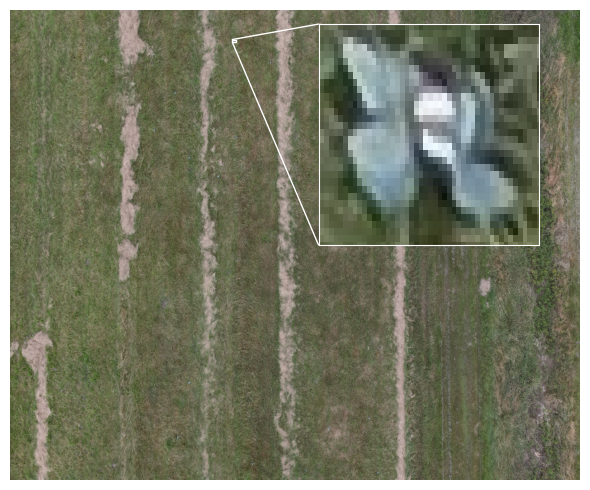

In [5]:
img = Path("/home/abe/data/20240801_clustered_4/DJI_202408010952_003_BennekomMappingCluster32m/DJI_20240801101950_0022.JPG")

fig, ax = plt.subplots(figsize=(6, 5))

plot_img_with_zoom_section(img, -0.27, -0.23, 2.52, 2.56, ax=ax)

fig.tight_layout()
save_fig("figures/example_annotation_f_32m_zoom.pdf", fig, format="pdf", dpi=300, bbox_inches="tight", pad_inches=0)
fig.show()

## Object distribution

In [3]:
clustered_distribution_file = Path("/home/abe/data/20240213_clustered_1/plants_clustered_1_RDNAPTRANS2008.csv")
clustered_locations = read_topcon_data(clustered_distribution_file)

uniform_distribution_file = Path("/home/abe/data/20240213_uniform_1/plants_uniform_1_RDNAPTRANS2008.csv")
uniform_locations = read_topcon_data(uniform_distribution_file)

CLASS_COLORS = {
    "F": (97, 150, 202),
    "W": (199, 86, 106),
}

EXTENT = Extent.from_lonlat(5.666859863769067, 5.669665991011977, 51.99065765607528, 51.991790778538724)

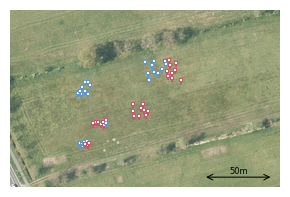

In [4]:
fig, ax = plt.subplots(figsize=(3, 2.5))
plot_markers(clustered_locations, CLASS_COLORS, ax=ax, legend_loc=None, marker_size=0.01, extent=EXTENT, scalebar_length=50.0)
fig.tight_layout()
save_fig("figures/map_clustered.pdf", fig, format="pdf", dpi=600, bbox_inches="tight", pad_inches=0)
fig.show()

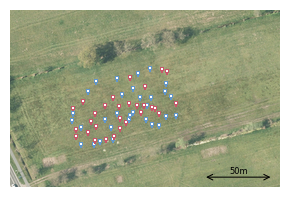

In [13]:
fig, ax = plt.subplots(figsize=(3, 2.5))
plot_markers(uniform_locations, CLASS_COLORS, ax=ax, legend_loc=None, marker_size=0.01, extent=EXTENT, scalebar_length=50.0)
fig.tight_layout()
save_fig("figures/map_uniform.pdf", fig, format="pdf", dpi=600, bbox_inches="tight", pad_inches=0)
fig.show()

## Additional objects figure

In [14]:
clustered_distribution_file = Path("experiments/number_of_objects/clustered_1_object_locations.kmz")
clustered_locations = read_kml_file(clustered_distribution_file)

uniform_distribution_file = Path("experiments/number_of_objects/uniform_1_object_locations.kmz")
uniform_locations = read_kml_file(uniform_distribution_file)

for loc in clustered_locations:
    loc.properties["class_name"] = "additional" if loc.properties["name"].startswith("additional_object") else "original"

for loc in uniform_locations:
    loc.properties["class_name"] = "additional" if loc.properties["name"].startswith("additional_object") else "original"

CLASS_COLORS = {
    "original": (97, 150, 202),
    "additional": (199, 86, 106),
}

EXTENT = Extent.from_lonlat(5.666859863769067, 5.669665991011977, 51.99065765607528, 51.991790778538724)

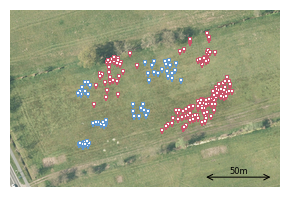

In [15]:
fig, ax = plt.subplots(figsize=(3, 2.5))
plot_markers(clustered_locations, CLASS_COLORS, ax=ax, legend_loc=None, marker_size=0.01, extent=EXTENT, scalebar_length=50.0)
fig.tight_layout()
save_fig("figures/additional_objects_clustered.pdf", fig, format="pdf", dpi=600, bbox_inches="tight", pad_inches=0)
fig.show()

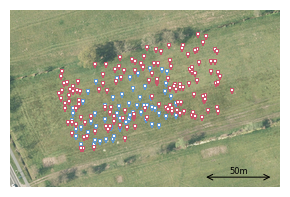

In [16]:
fig, ax = plt.subplots(figsize=(3, 2.5))
plot_markers(uniform_locations, CLASS_COLORS, ax=ax, legend_loc=None, marker_size=0.01, extent=EXTENT, scalebar_length=50.0)
fig.tight_layout()
save_fig("figures/additional_objects_uniform.pdf", fig, format="pdf", dpi=600, bbox_inches="tight", pad_inches=0)
fig.show()

## Area of the fields

In [6]:
fields = {
    "clustered_1": Path("fields/clustered_1.geojson"),
    "clustered_2": Path("fields/clustered_2.geojson"),
    "clustered_3": Path("fields/clustered_3.geojson"),
    "clustered_4": Path("fields/clustered_4.geojson"),
    "uniform_1": Path("fields/uniform_1.geojson"),
    "uniform_2": Path("fields/uniform_2.geojson"),
    "uniform_3": Path("fields/uniform_3.geojson"),
    "uniform_4": Path("fields/uniform_4.geojson"),
}

rows = []
header = ["Dataset name", "Area [m2]"]
for name, boundary_file in fields.items():
    polygon_utm = Polygon(
        [Location(np.array([c[1], c[0]], dtype=np.float64)).utm_coordinate for c in read_polygon_file(boundary_file).exterior.coords]
    )
    rows.append([name, polygon_utm.area])

_display_table(tabulate(rows, headers=header, tablefmt="html", floatfmt=".1f"))

Dataset name,Area [m2]
clustered_1,7476.7
clustered_2,7476.7
clustered_3,6651.8
clustered_4,7262.9
uniform_1,7476.7
uniform_2,7476.7
uniform_3,6651.8
uniform_4,7262.9
